In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [73]:
df = pd.read_csv("/Users/intanfarhi/Documents/Purwadhika/CapstoneProject3/SupermarketCustomers.csv", sep='\t')

In [74]:
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [ ]:
# Cek Nilai kosong
missing_value = df.isnull().sum()
print(missing_value)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
# Menghapus income yang kosong
df = df.dropna(subset=['Income'])

In [117]:
print(df['Income'].describe())

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


In [ ]:
# Cek duplikasi
duplicates = df.duplicated().sum()
print(f'Duplicate: {duplicates}')

Duplicate: 0


<Axes: ylabel='Income'>

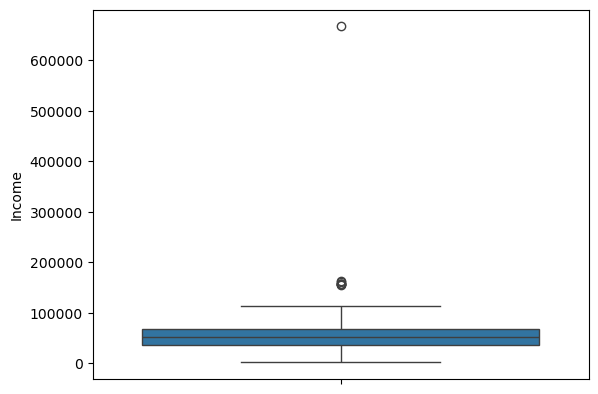

In [ ]:
# Cek boxplot untuk cek outlier
import seaborn as sns
sns.boxplot(df['Income'])

In [ ]:
# Hapus outlier
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]


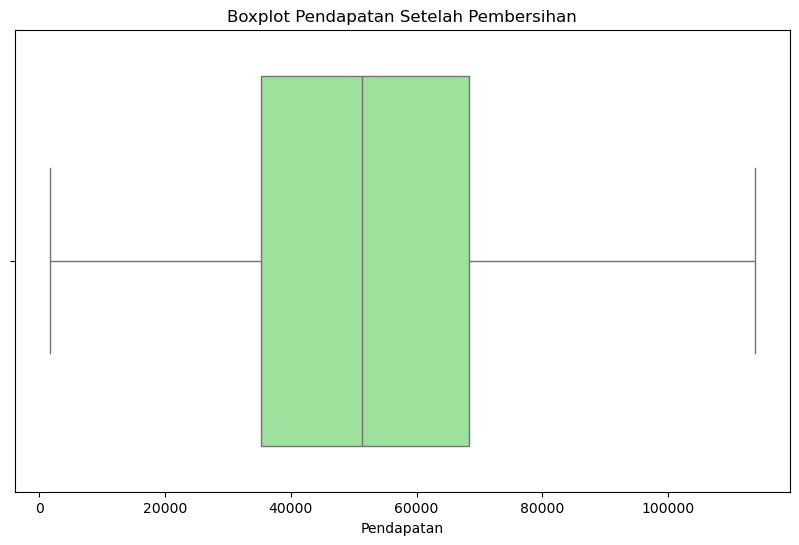

In [143]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Income'], color='lightgreen')
plt.title('Boxplot Pendapatan Setelah Pembersihan')
plt.xlabel('Pendapatan')
plt.show()

In [146]:
print("\nStatistik Deskriptif untuk Pemasukan:")
print(df_cleaned['Income'].describe())


Statistik Deskriptif untuk Pemasukan:
count      2208.000000
mean      51633.638134
std       20713.376530
min        1730.000000
25%       35196.000000
50%       51301.000000
75%       68289.750000
max      113734.000000
Name: Income, dtype: float64


In [149]:
# Rename MntWines and MntMeatProducts
df_cleaned.rename(columns={
    'MntWines': 'Pengeluaran untuk Wine',
    'MntMeatProducts': 'Pengeluaran untuk produk daging'
}, inplace=True)

In [153]:
# Membagi pelanggan menjadi 3 kategori pendapatan
# Low, Medium, dan High
bins = [0, 35000, 70000, 120000]
labels = ['Rendah', 'Sedang', 'Tinggi']
df_cleaned['Golongan Pemasukan'] = pd.cut(df_cleaned['Income'], bins=bins, labels=labels)

# Rata-rata pengeluaran untuk produk wine dan daging pada kategori pendapatan
SpendByIncome = df_cleaned.groupby('Golongan Pemasukan')[['Pengeluaran untuk Wine', 'Pengeluaran untuk produk daging']].mean()
print("\nRata-rata Pengeluaran Berdasarkan Golongan Pemasukan:")
print(SpendByIncome)


Rata-rata Pengeluaran Berdasarkan Golongan Pemasukan:
                    Pengeluaran untuk Wine  Pengeluaran untuk produk daging
Golongan Pemasukan                                                         
Rendah                           21.324226                        22.289617
Sedang                          292.233822                       114.053494
Tinggi                          650.930000                       441.326000


/var/folders/mw/z3kzz6w94jlg5x6x44_4d6qm0000gn/T/ipykernel_66484/2028125994.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  SpendByIncome = df_cleaned.groupby('Golongan Pemasukan')[['Pengeluaran untuk Wine', 'Pengeluaran untuk produk daging']].mean()


Text(0.5, 0, 'Golongan Pemasukan')

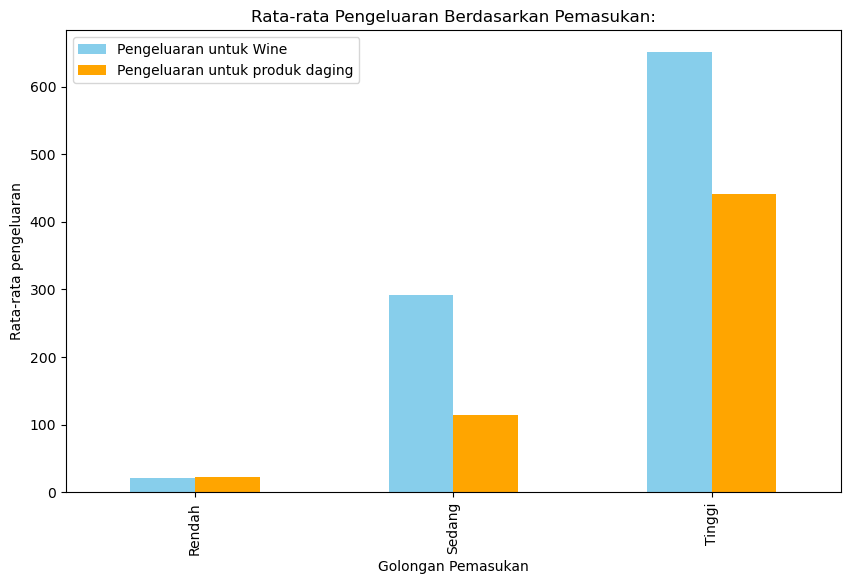

In [155]:
# Visualisasi Histogram

SpendByIncome.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])  
plt.title('Rata-rata Pengeluaran Berdasarkan Pemasukan:') 
plt.ylabel('Rata-rata pengeluaran') 
plt.xlabel('Golongan Pemasukan')
